In [1]:
import tensorflow as tf
import numpy as np
import time
import os
import sys
import pandas
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
#必要的库和库的版本检查#
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pandas,sklearn,tf,keras:
    print(module.__name__, )

2.1.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib
numpy
pandas
sklearn
tensorflow
tensorflow_core.python.keras.api._v2.keras


In [3]:
#取数据集#
fashion_mnist=keras.datasets.mnist
(x_all,y_all),(x_test,y_test)=fashion_mnist.load_data()
x_val,x_train=x_all[:5000],x_all[5000:]
y_val,y_train=y_all[:5000],y_all[5000:]

print(x_val.shape,y_val.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

11493376/11490434 [==============================] - 307s 27us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
model=keras.models.Sequential()
flt=64
model.add(tf.keras.layers.SeparableConv2D(filters=32,kernel_size=3,padding="same",activation="selu",input_shape=(28,28,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.SeparableConv2D(filters=flt,kernel_size=3,padding="same",activation="selu"))
model.add(tf.keras.layers.SeparableConv2D(filters=flt,kernel_size=3,padding="same",activation="selu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.SeparableConv2D(filters=flt,kernel_size=3,padding="same",activation="selu"))
model.add(tf.keras.layers.SeparableConv2D(filters=flt,kernel_size=3,padding="same",activation="selu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Densl)
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(128,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
model.summary()
print("ok")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 28, 28, 32)        73        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 14, 14, 64)        2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 14, 14, 64)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 7, 7, 64)          4736      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 7, 7, 64)          4

In [5]:
#归一化#
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,3)
x_val_scaled=scaler.fit_transform(x_val.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,3)
x_test_scaled=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,3)
print("ok")

ok


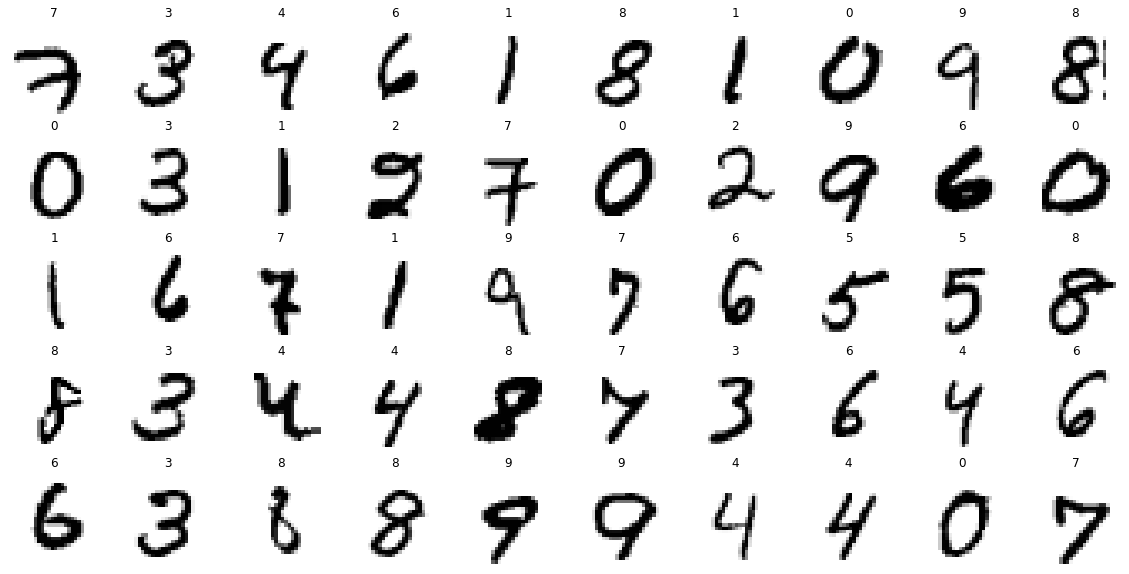

In [7]:
def showImgs(rows,cols,xdata,ydata,classname):
    assert len(xdata)==len(ydata)
    assert rows*cols<=len(xdata)
    plt.figure(figsize=(cols*2.0,rows*2.0))
    for row in range(rows):
        for col in range(cols):
            index=cols*row+col
            plt.subplot(rows,cols,index+1)
            plt.imshow(xdata[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(classname[ydata[index]])
    plt.show()
classname=["0","1","2","3","4","5","6","7","8","9"]
showImgs(5,10,x_train,y_train,classname)

In [9]:
logdir=os.path.join("sep_cnn_number")
if not os.path.exists(logdir):
    os.mkdir(logdir)
outputs=os.path.join(logdir,"fashion_mnist_model.h5")
callbacks=[keras.callbacks.TensorBoard(logdir),
           keras.callbacks.ModelCheckpoint(outputs,save_best_only=True),
           keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]


def train(model):
    history=model.fit(x_train_scaled,y_train,epochs=14,validation_data=(x_val_scaled,y_val),callbacks=callbacks)
    return history
histories=train(model)

Train on 55000 samples, validate on 5000 samples
Epoch 1/14
55000/55000 [==============================] - 85s 2ms/sample - loss: 2.3088 - accuracy: 0.1070 - val_loss: 2.3130 - val_accuracy: 0.0868
Epoch 2/14
55000/55000 [==============================] - 87s 2ms/sample - loss: 2.3072 - accuracy: 0.1081 - val_loss: 2.3073 - val_accuracy: 0.0986
Epoch 3/14
55000/55000 [==============================] - 86s 2ms/sample - loss: 2.1596 - accuracy: 0.2001 - val_loss: 1.2726 - val_accuracy: 0.5998
Epoch 4/14
55000/55000 [==============================] - 87s 2ms/sample - loss: 0.6968 - accuracy: 0.7789 - val_loss: 0.4560 - val_accuracy: 0.8560
Epoch 5/14
55000/55000 [==============================] - 90s 2ms/sample - loss: 0.3637 - accuracy: 0.8893 - val_loss: 0.2943 - val_accuracy: 0.9130
Epoch 6/14
55000/55000 [==============================] - 91s 2ms/sample - loss: 0.2575 - accuracy: 0.9215 - val_loss: 0.2111 - val_accuracy: 0.9348
Epoch 7/14
55000/55000 [==============================] -

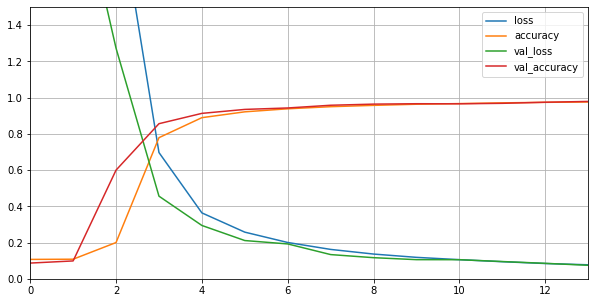

In [11]:
def showDnCurve(history):
    pandas.DataFrame(history.history).plot(figsize=(10,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1.5)
    plt.show()
showDnCurve(histories)

In [10]:
#测试#
model.evaluate(x_test_scaled,y_test)

10000/10000 [==============================] - 5s 457us/sample - loss: 0.0699 - accuracy: 0.9755


[0.06990192322190851, 0.9755]